In [1]:
def head(X: list, n = 5) -> list:
    """
    return `n` (default is 5) first rows of a 2D list
    ### Parameters
    `X` : The 2D list
    `n` : number of first rows
    ### Example
    ```python
    >>> X = [[1,2], [3,4], [5,6]]
    >>> print(head(X))
    [[1,2],
     [3,4],
     [5,6]]
    >>> print(head(X,2))
    [[1,2],
     [3,4]]
    ```
    """
    return X[:n]

def tail(X: list, n = 5) -> list:
    """
    return `n` (default is 5) last rows of a 2D list
    ### Parameters
    `X` : The 2D list
    `n` : number of last rows
    ### Example
    ```python
    >>> X = [[1,2], [3,4], [5,6]]
    >>> print(tail(X))
    [[1,2],
     [3,4],
     [5,6]]
    >>> print(tail(X,2))
    [[3,4],
     [5,6]]
    ```
    """
    return X[(-n):]

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

[[ 1.00547981 -6.48840874]
 [-5.87616811  5.98012189]
 [ 5.11832047 -9.20092323]
 [-4.93699539  5.34796872]
 [ 3.01703282  4.41842321]]
[2 3 0 ... 3 0 1] : Original labels
[3 2 1 ... 2 1 0] : Original Predictions
[2 3 0 ... 3 0 1] : Prediction labels after correction
Accuracy score of predictions: 99.96 %


<Axes: >

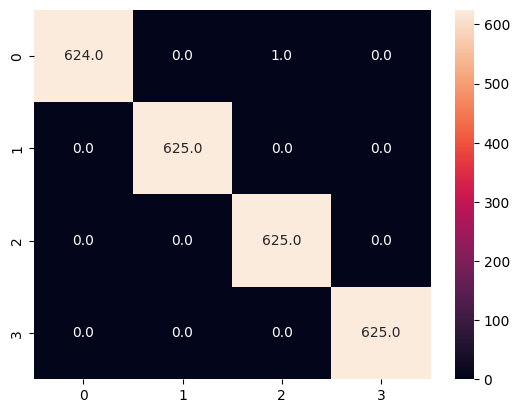

In [32]:
X, y = make_blobs(n_samples=2500, centers=4, n_features=2, random_state=10)
kms = KMeans(n_clusters=4,random_state=0, n_init='auto').fit(X)
y_pred = kms.predict(X)
print(head(X))
print(y, ": Original labels")
print(y_pred, ": Original Predictions")
y_corrected_labels = y_pred.copy()
# need to change the label to something completely different
# otherwise if swaps between two label are done over a single for-loop
# that would swap single label twice, making the label swapping useless
# that is why first loop changes values [0,1,2,3] -> [7,8,9,10]
# then back to [7,8,9,10] -> [1,0,3,2]
for i in range(len(y_corrected_labels)):
    if y_corrected_labels[i] == 0:
        y_corrected_labels[i] = 7
    elif y_corrected_labels[i] == 1:
        y_corrected_labels[i] = 8
    elif y_corrected_labels[i] == 2:
        y_corrected_labels[i] = 9
    elif y_corrected_labels[i] == 3:
        y_corrected_labels[i] = 10

for i in range(len(y_corrected_labels)):
    if y_corrected_labels[i] == 7:
        y_corrected_labels[i] = 1
    elif y_corrected_labels[i] == 8:
        y_corrected_labels[i] = 0
    elif y_corrected_labels[i] == 9:
        y_corrected_labels[i] = 3
    elif y_corrected_labels[i] == 10:
        y_corrected_labels[i] = 2
print(y_corrected_labels, ": Prediction labels after correction")
print("Accuracy score of predictions:", round(accuracy_score(y,y_corrected_labels)*100,2), "%")
cmat = confusion_matrix(y, y_corrected_labels)
sns.heatmap(data=cmat, annot=True, fmt="1.1f")

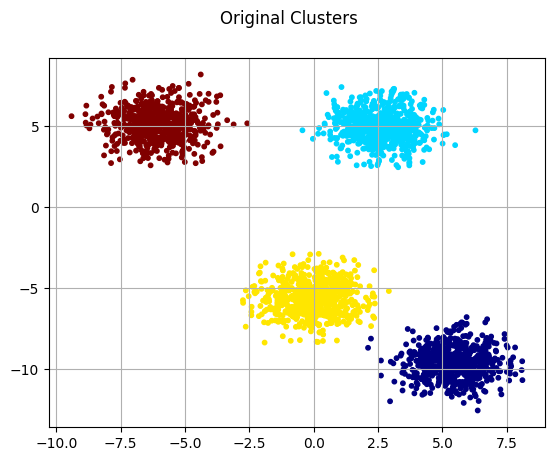

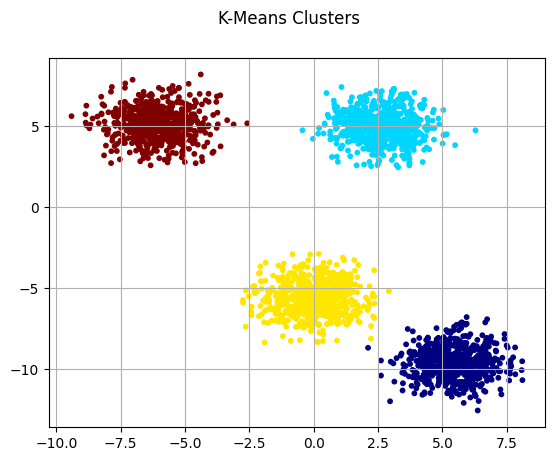

In [33]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet',s=10)
plt.suptitle('Original Clusters')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_corrected_labels, cmap='jet',s=10)
plt.suptitle('K-Means Clusters')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()